In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [2]:
df = pd.read_csv('zomato.csv',encoding='latin-1') # wE HAVE TO USE SOME KIND OF ENCODING
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

#### In Data-Analysis the things we do are:
1. Find Missing Values
2. Explore about the Numerical variables
3. Explore about Categorial variables
4. Finidng relationships between features

In [6]:
# Find Missing Values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
# Null Values
[feature for feature in df.columns if df[feature].isnull().sum()>1]

['Cuisines']

<Axes: >

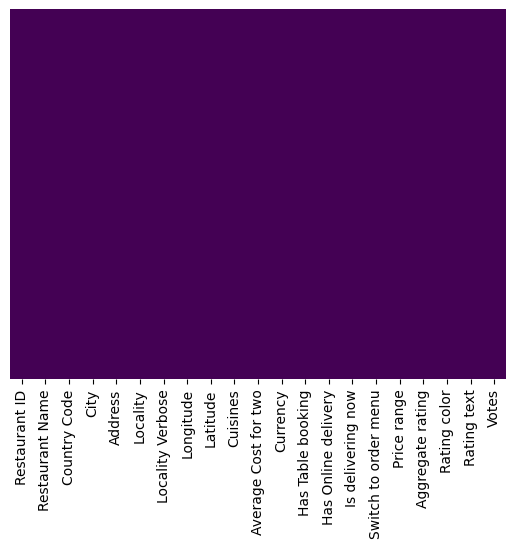

In [8]:
# Using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country

Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States

In [10]:
final_df = pd.merge(df,df_country,on='Country Code',how='left')
final_df.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  ...  Has Table booking Has Online delivery  \
0  French, Japanese, Desserts  ...                Yes                  No   
1                    Japanese  ...                Yes                  No   

  Is delivering now Switch to order menu Price range Aggregate rating  \
0                No                   No           3              4.8   
1                No                   No           3              4.5   

   Rating color  Rating text Votes      Country  
0    Dark Green    Excellent   314  Phillipines  
1    Dark Green    Excellent   591  Phillipines  

[2 rows x 22 columns]

In [11]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [12]:
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [13]:
country_names = final_df.Country.value_counts().index

In [14]:
country_values= final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x7fada2b22850>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

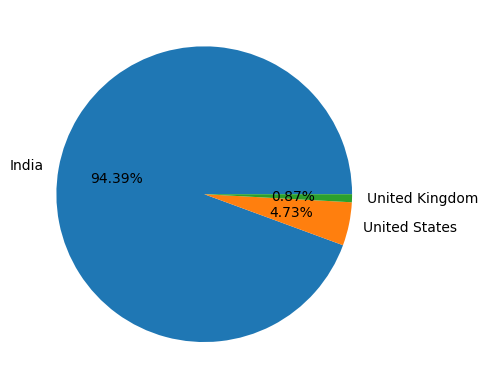

In [15]:
# Pie Plot top 3 Counties
plt.pie(country_values[:3],labels=country_names[:3],autopct='%1.2f%%')

Observation:
1. Zomatop is mostly used in India
2. Then in US
3. Then in UK

In [16]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [17]:
ratings = final_df.groupby(['Aggregate rating' , 'Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [18]:
ratings

Aggregate rating Rating color Rating text  Rating Count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Average           522
16               3.3       Orange     Average           483
17               3.4       Orange     Average           498
18               3.5       Yellow        Good           480
19               3.6       Yellow        Good           458
20               3.7       Yellow        Good           427
21               3.8       Yellow        Good           400
22               3.9       Yellow        Good           335
23               4.0        Green   Very Good           266
24               4.1        Green   Very Good           274
25               4.2        Green   Very Good           221
26               4.3        Green   Very Good           174
27               4.4        Green   Very Good           144
28               4.5   Dark Green   Excellent            95
29               4.6   Dark Green   Excellent            78
30               4.7   Dark Green   Excellent            42
31               4.8   Dark Green   Excellent            25
32               4.9   Dark Green   Excellent            61

#### Observations
1. When rating is between 4.5-4.9 ----> Excellent
2. When rating is between 4.0-4.4 ----> Very Good
3. When rating is between 3.5-3.9 ----> Good
4. When rating is between 2.5-3.4 ----> Average
5. When rating is between 1.8-2.4 ----> Poor

In [19]:
ratings.head()

Aggregate rating Rating color Rating text  Rating Count
0               0.0        White   Not rated          2148
1               1.8          Red        Poor             1
2               1.9          Red        Poor             2
3               2.0          Red        Poor             7
4               2.1          Red        Poor            15

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

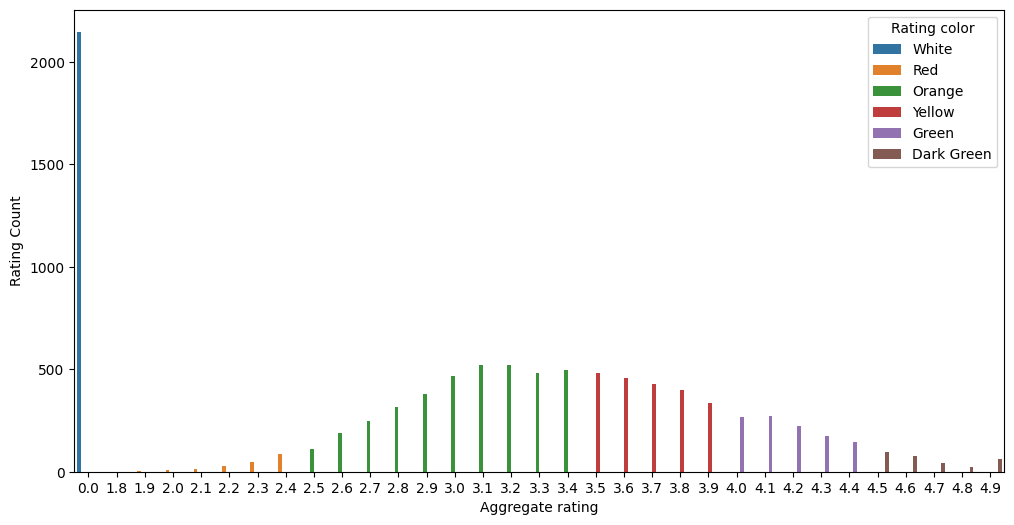

In [20]:
mpl.rcParams['figure.figsize']= (12,6)
sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings,hue='Rating color')

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

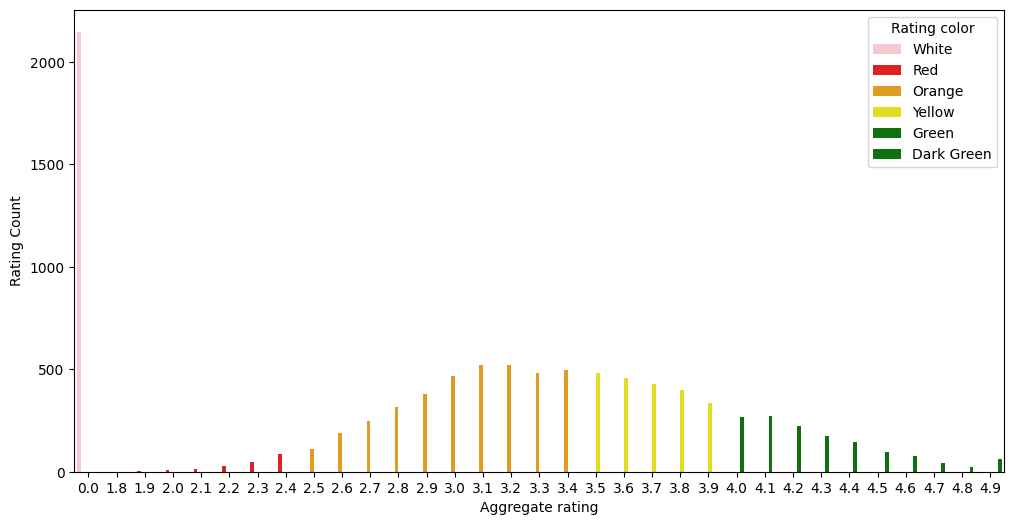

In [21]:
mpl.rcParams['figure.figsize']= (12,6)
sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings,hue='Rating color',palette=['pink','red','orange','yellow','green','green'])

Observations:
    1. Not Rated Count is very high
    2. Max no of ratings are between 2.5 to 3.4

<Axes: xlabel='Rating color', ylabel='count'>

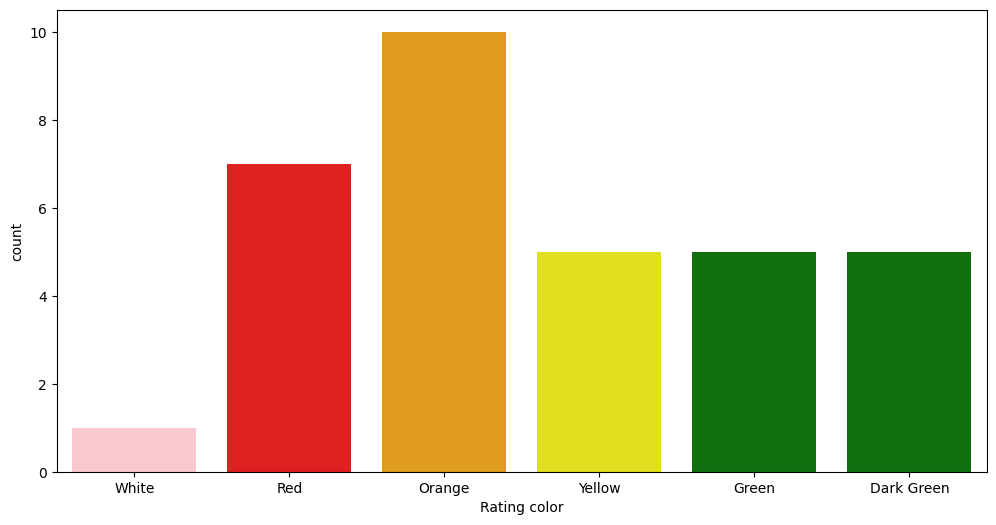

In [22]:
# Count Plot : It is frequency of each color in df
sns.countplot(x = 'Rating color',data=ratings,palette=['pink','red','orange','yellow','green','green'])

In [23]:
## Find the countries that have given 0 ratings
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [24]:
countries = final_df.loc[final_df['Aggregate rating'] == 0,'Country']
countries.value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [25]:
countries = final_df.loc[final_df['Aggregate rating'] == 0,'Country']
df3 = pd.DataFrame(countries.value_counts())
df3

Country
India              2139
Brazil                5
United States         3
United Kingdom        1

In [26]:
#Other way
countries = final_df.loc[final_df['Rating color'] == 'White'].groupby("Country").size().reset_index()
countries.value_counts()

Country         0   
Brazil          5       1
India           2139    1
United Kingdom  1       1
United States   3       1
dtype: int64

In [27]:
# Other Way
countries1 = final_df[final_df['Rating color'] == 'White'].groupby('Country').size().reset_index().rename(columns={0:"Num of Ratings"})
countries1

Country  Num of Ratings
0          Brazil               5
1           India            2139
2  United Kingdom               1
3   United States               3

Observations :
   1. Max no of 0 Ratings are from Indian  Customers
 

In [28]:
## Find out Which Currencecy is used by whiich country
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [29]:
# My Sol
curr = final_df[['Country',"Currency"]].value_counts().reset_index()
curr

Country                Currency     0
0            India      Indian Rupees(Rs.)  8652
1    United States               Dollar($)   434
2   United Kingdom              Pounds(£)    80
3           Brazil      Brazilian Real(R$)    60
4     South Africa                 Rand(R)    60
5              UAE      Emirati Diram(AED)    60
6      New Zealand           NewZealand($)    40
7           Turkey        Turkish Lira(TL)    34
8        Australia               Dollar($)    24
9      Phillipines        Botswana Pula(P)    22
10       Indonesia  Indonesian Rupiah(IDR)    21
11           Qatar         Qatari Rial(QR)    20
12       Singapore               Dollar($)    20
13       Sri Lanka   Sri Lankan Rupee(LKR)    20
14          Canada               Dollar($)     4

In [30]:
# Alternative 
final_df[['Country',"Currency"]].groupby(['Country','Currency']).size().reset_index()

Country                Currency     0
0        Australia               Dollar($)    24
1           Brazil      Brazilian Real(R$)    60
2           Canada               Dollar($)     4
3            India      Indian Rupees(Rs.)  8652
4        Indonesia  Indonesian Rupiah(IDR)    21
5      New Zealand           NewZealand($)    40
6      Phillipines        Botswana Pula(P)    22
7            Qatar         Qatari Rial(QR)    20
8        Singapore               Dollar($)    20
9     South Africa                 Rand(R)    60
10       Sri Lanka   Sri Lankan Rupee(LKR)    20
11          Turkey        Turkish Lira(TL)    34
12             UAE      Emirati Diram(AED)    60
13  United Kingdom              Pounds(£)    80
14   United States               Dollar($)   434

In [31]:
## Which countries do have Online Deliveries
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [32]:
## My Sol
online_del = final_df.loc[final_df["Has Online delivery"] == "Yes","Country"].value_counts().reset_index()
online_del

index  Country
0  India     2423
1    UAE       28

In [33]:
online_del = final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()
online_del

Has Online delivery         Country     0
0                   No       Australia    24
1                   No          Brazil    60
2                   No          Canada     4
3                   No           India  6229
4                   No       Indonesia    21
5                   No     New Zealand    40
6                   No     Phillipines    22
7                   No           Qatar    20
8                   No       Singapore    20
9                   No    South Africa    60
10                  No       Sri Lanka    20
11                  No          Turkey    34
12                  No             UAE    32
13                  No  United Kingdom    80
14                  No   United States   434
15                 Yes           India  2423
16                 Yes             UAE    28

Observations:
   1. Only India and UAE have online deliveries

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)
[5473 1118 1080  251   25   21   21   21   21   21   20   20   20   20
   20   20   20   20   20   20   20   20   20   20   20   20   20   20
   20   20   20   20   20   20   20   20   20   20   20   20   20   20
   20   20   20   20   20   20   20   20   20   20   20   20   20   20
   20   20   20   20   20   20   20   20   20   20   20   20   20   20
   20   20   20   20   20   20   20   18   18   16   14   11    6    4
    4    3    3    2    2    2    2    2    2    2    2    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1  

([<matplotlib.patches.Wedge at 0x7fad8e4e7220>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

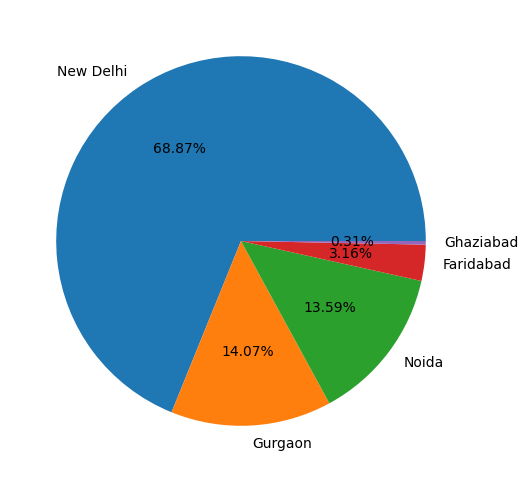

In [34]:
## Create a pie chart for cities distribution
cities_names = final_df.City.value_counts().index
city_values = final_df.City.value_counts().values
print(cities_names)
print(city_values)
plt.pie(city_values[:5],labels=cities_names[:5],autopct='%1.2f%%')

In [35]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [36]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


### Creating Map of New Delhi

In [37]:
# We will get langitude and latitude of new delhi app using code

In [38]:
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="my_app")

# Get the location information for New Delhi
location = geolocator.geocode("New Delhi, India")

# Extract the latitude and longitude
latitude = location.latitude
longitude = location.longitude

print("Latitude:", latitude)
print("Longitude:", longitude)


Latitude: 28.6138954
Longitude: 77.2090057


In [39]:
world_map = folium.Map()
world_map

In [40]:
new_delhi = folium.Map(location=[28.6138954, 77.2090057], zoom_start=13)

In [41]:
Latitude = df.loc[df['City'] == 'New Delhi','Latitude']
Longitude = df.loc[df['City'] == 'New Delhi','Longitude']

In [42]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(Latitude, Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='white',
            fill=True,
            fill_color='black',
            fill_opacity=0.6
        )
    )

# add incidents to map
new_delhi.add_child(incidents)
new_delhi

## Creating Map of Gurgaon

In [43]:
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="my_app")

# Get the location information for New Delhi
location = geolocator.geocode("Gurgaon, India")

# Extract the latitude and longitude
latitude = location.latitude
longitude = location.longitude

print("Latitude:", latitude)
print("Longitude:", longitude)

Latitude: 28.42826235
Longitude: 77.00270014657752


In [44]:
gurgaon = folium.Map(location=[28.42826235, 77.00270014657752], zoom_start=13)
gurgaon

In [45]:
Latitude = df.loc[df['City'] == 'Gurgaon','Latitude']
Longitude = df.loc[df['City'] == 'Gurgaon','Longitude']

In [46]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(Latitude, Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='white',
            fill=True,
            fill_color='black',
            fill_opacity=0.6
        )
    )

# add incidents to map
gurgaon.add_child(incidents)
gurgaon

## Creating map of Goida 

In [47]:
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="my_app")

# Get the location information for New Delhi
location = geolocator.geocode("Noida, India")

# Extract the latitude and longitude
latitude = location.latitude
longitude = location.longitude

print("Latitude:", latitude)
print("Longitude:", longitude)

Latitude: 28.5706333
Longitude: 77.3272147


In [48]:
noida = folium.Map(location=[latitude,longitude], zoom_start=13)
noida

In [49]:
Latitude = df.loc[df['City'] == 'Noida','Latitude']
Longitude = df.loc[df['City'] == 'Noida','Longitude']

In [50]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(Latitude, Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='white',
            fill=True,
            fill_color='black',
            fill_opacity=0.6
        )
    )

# add incidents to map
noida.add_child(incidents)
noida

## Creating map of faridabad and ghazi pur

In [51]:
# Faridabad
